In [1]:
#Importing libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score,precision_score, recall_score

### **Loading Data**

In [2]:
data = pd.read_csv('all.csv')


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
#no of rows and columns
data.shape

(1047, 10)

In [5]:
#getting info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Car_Make                   1047 non-null   object
 1   Car_Model                  1047 non-null   object
 2   Year                       1047 non-null   int64 
 3   Kms_Driven                 1047 non-null   int64 
 4   Engine_Oil_Change          1047 non-null   int64 
 5   Brake_Pad_Change           1047 non-null   int64 
 6   Transmission_Fluid_Change  1047 non-null   int64 
 7   Tire_Rotation              1047 non-null   int64 
 8   Spark_Plug_Change          1047 non-null   int64 
 9   Maintenance_Required       1047 non-null   object
dtypes: int64(7), object(3)
memory usage: 81.9+ KB


In [6]:
#for first 5 rows
data.head()

Car_Make     Car_Model  Year  Kms_Driven  Engine_Oil_Change  \
0   Maruti   Suzuki Alto  2008       30000              25000   
1  Hyundai           i10  2010       35000              30000   
2     Tata        Indica  2012       40000              35000   
3    Honda          City  2015       45000              40000   
4   Maruti  Suzuki Swift  2017       50000              45000   

   Brake_Pad_Change  Transmission_Fluid_Change  Tire_Rotation  \
0             40000                      60000          30000   
1             45000                      65000          35000   
2             50000                      70000          40000   
3             55000                      75000          45000   
4             60000                      80000          50000   

   Spark_Plug_Change Maintenance_Required  
0              45000              Absence  
1              50000              Absence  
2              55000              Absence  
3              60000              Absence  
4              65000              Absence

In [7]:
#for last 5 rows
data.tail()

Car_Make Car_Model  Year  Kms_Driven  Engine_Oil_Change  \
1042           Audi        A3  2019       30000              10000   
1043            BMW  3 Series  2018       40000               8000   
1044  Mercedes-Benz   C-Class  2017       50000              10000   
1045         Jaguar        XE  2016       60000              12000   
1046          Volvo       S60  2015       70000              10000   

      Brake_Pad_Change  Transmission_Fluid_Change  Tire_Rotation  \
1042             20000                      40000          10000   
1043             16000                      32000           8000   
1044             25000                      50000          12500   
1045             24000                      48000          12000   
1046             20000                      40000          10000   

      Spark_Plug_Change Maintenance_Required  
1042              30000              Absence  
1043              24000              Absence  
1044              37500              Absence  
1045              36000              Absence  
1046              30000              Absence

In [8]:
#statistical measures about the data
data.describe().T

count          mean           std      min  \
Year                       1047.0   2016.214900      4.233465   2005.0   
Kms_Driven                 1047.0  83782.234957  94985.972344   3000.0   
Engine_Oil_Change          1047.0  27419.675263  37149.077416   2400.0   
Brake_Pad_Change           1047.0  42215.854823  33971.352468   7000.0   
Transmission_Fluid_Change  1047.0  56468.958930  37277.122777  10000.0   
Tire_Rotation              1047.0  39218.720153  37432.136339    500.0   
Spark_Plug_Change          1047.0  74004.297994  61761.864813  13000.0   

                               25%      50%       75%       max  
Year                        2013.0   2017.0    2020.0    2023.0  
Kms_Driven                 28500.0  45000.0   80000.0  500000.0  
Engine_Oil_Change           5600.0  10000.0   24500.0  151000.0  
Brake_Pad_Change           20000.0  28000.0   54500.0  153000.0  
Transmission_Fluid_Change  25000.0  44000.0   80000.0  175000.0  
Tire_Rotation              18000.0  23000.0   45000.0  200000.0  
Spark_Plug_Change          36000.0  46000.0  100000.0  498000.0

In [9]:
##feature engineering
#To get null values of column
data.isnull().sum()

Car_Make                     0
Car_Model                    0
Year                         0
Kms_Driven                   0
Engine_Oil_Change            0
Brake_Pad_Change             0
Transmission_Fluid_Change    0
Tire_Rotation                0
Spark_Plug_Change            0
Maintenance_Required         0
dtype: int64

<Axes: >

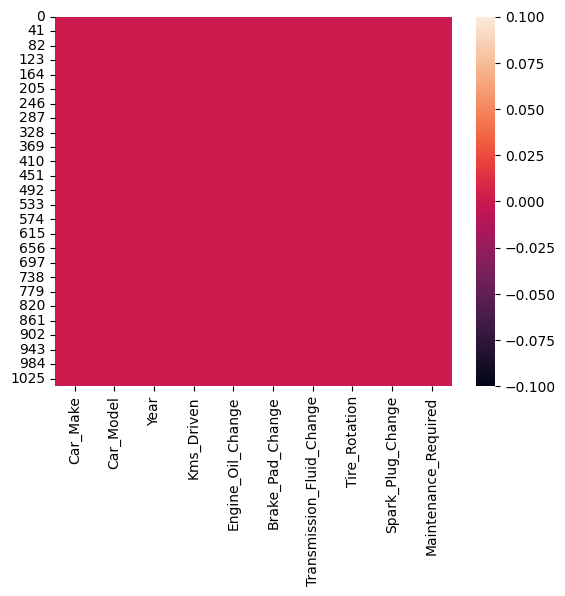

In [10]:
#heatmap to show null values
sns.heatmap(data.isnull())
#as dataset don't have any null value so it is showing the red colour which is 0.0 according to scale

In [11]:
data.dtypes

Car_Make                     object
Car_Model                    object
Year                          int64
Kms_Driven                    int64
Engine_Oil_Change             int64
Brake_Pad_Change              int64
Transmission_Fluid_Change     int64
Tire_Rotation                 int64
Spark_Plug_Change             int64
Maintenance_Required         object
dtype: object

### **Data Cleaning And Visualization**

In [12]:
data = data.drop('Car_Make', axis=1)


In [13]:
data = data.drop('Car_Model', axis=1)


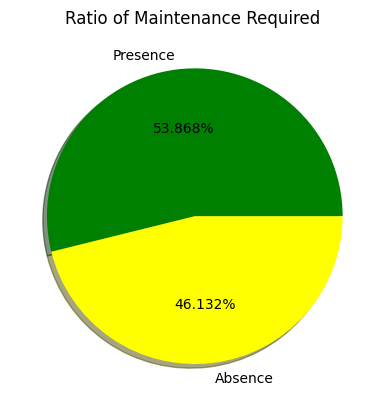

In [14]:
#To show the Fuel type using pie chart
plt.pie(x = data['Maintenance_Required'].value_counts() ,autopct='%1.3f%%' ,labels=['Presence', 'Absence'], colors=['green', 'yellow'], shadow=True)
plt.title('Ratio of Maintenance Required ')
plt.show()


<Axes: xlabel='Maintenance_Required', ylabel='count'>

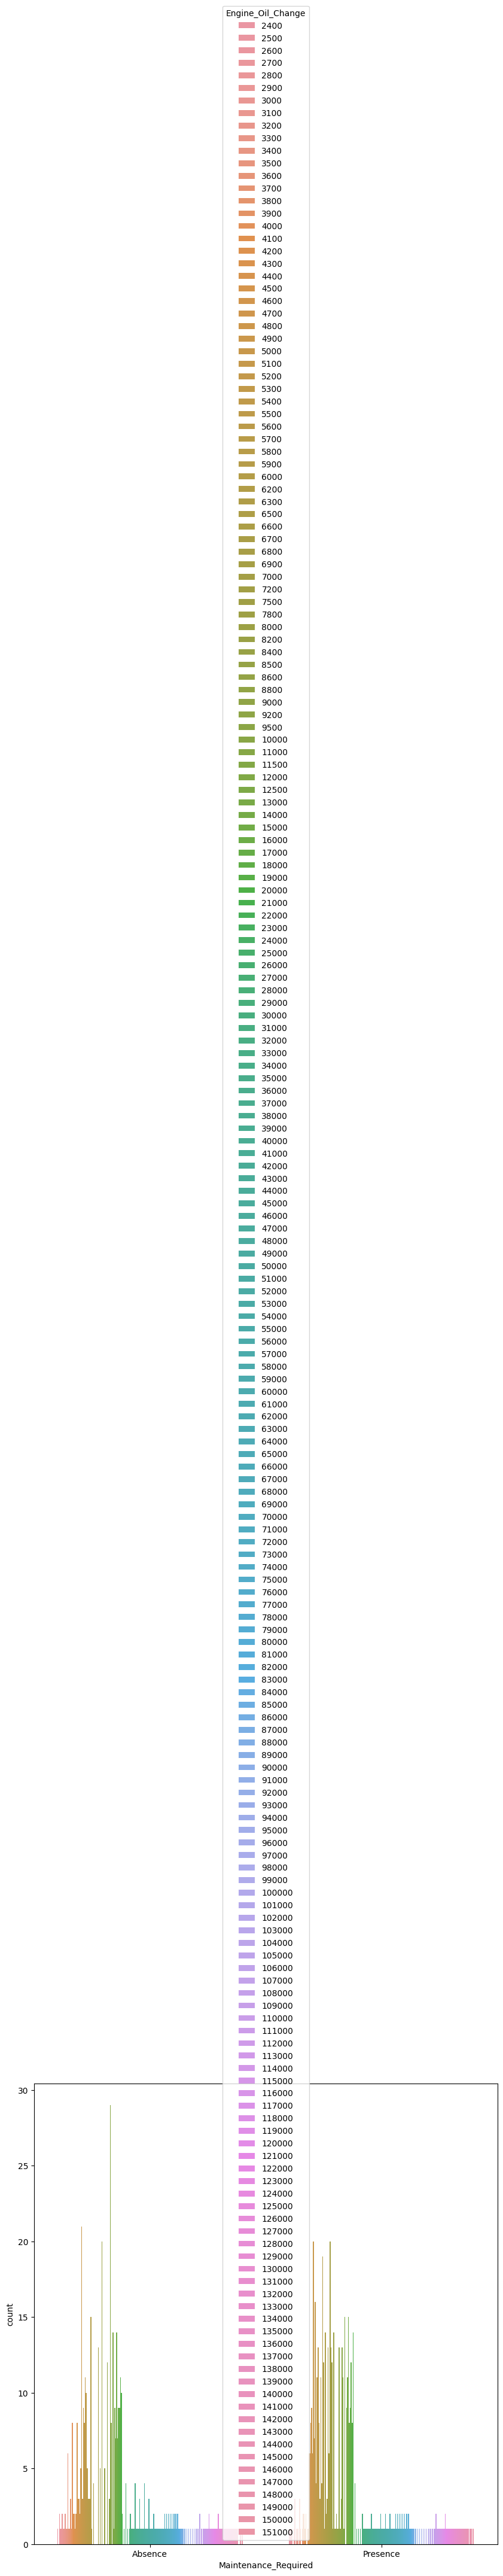

In [15]:
#count graph for heart disease vs Thallium
plt.figure(figsize=(10,10))
sns.countplot(data=data,hue='Engine_Oil_Change',x='Maintenance_Required')

In [16]:
data["Year_old"]=2024-data["Year"]

In [17]:
data = data.drop('Year', axis=1)


In [18]:
# FMaintenance required to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["Maintenance_Required"] = encoder.fit_transform(data["Maintenance_Required"])

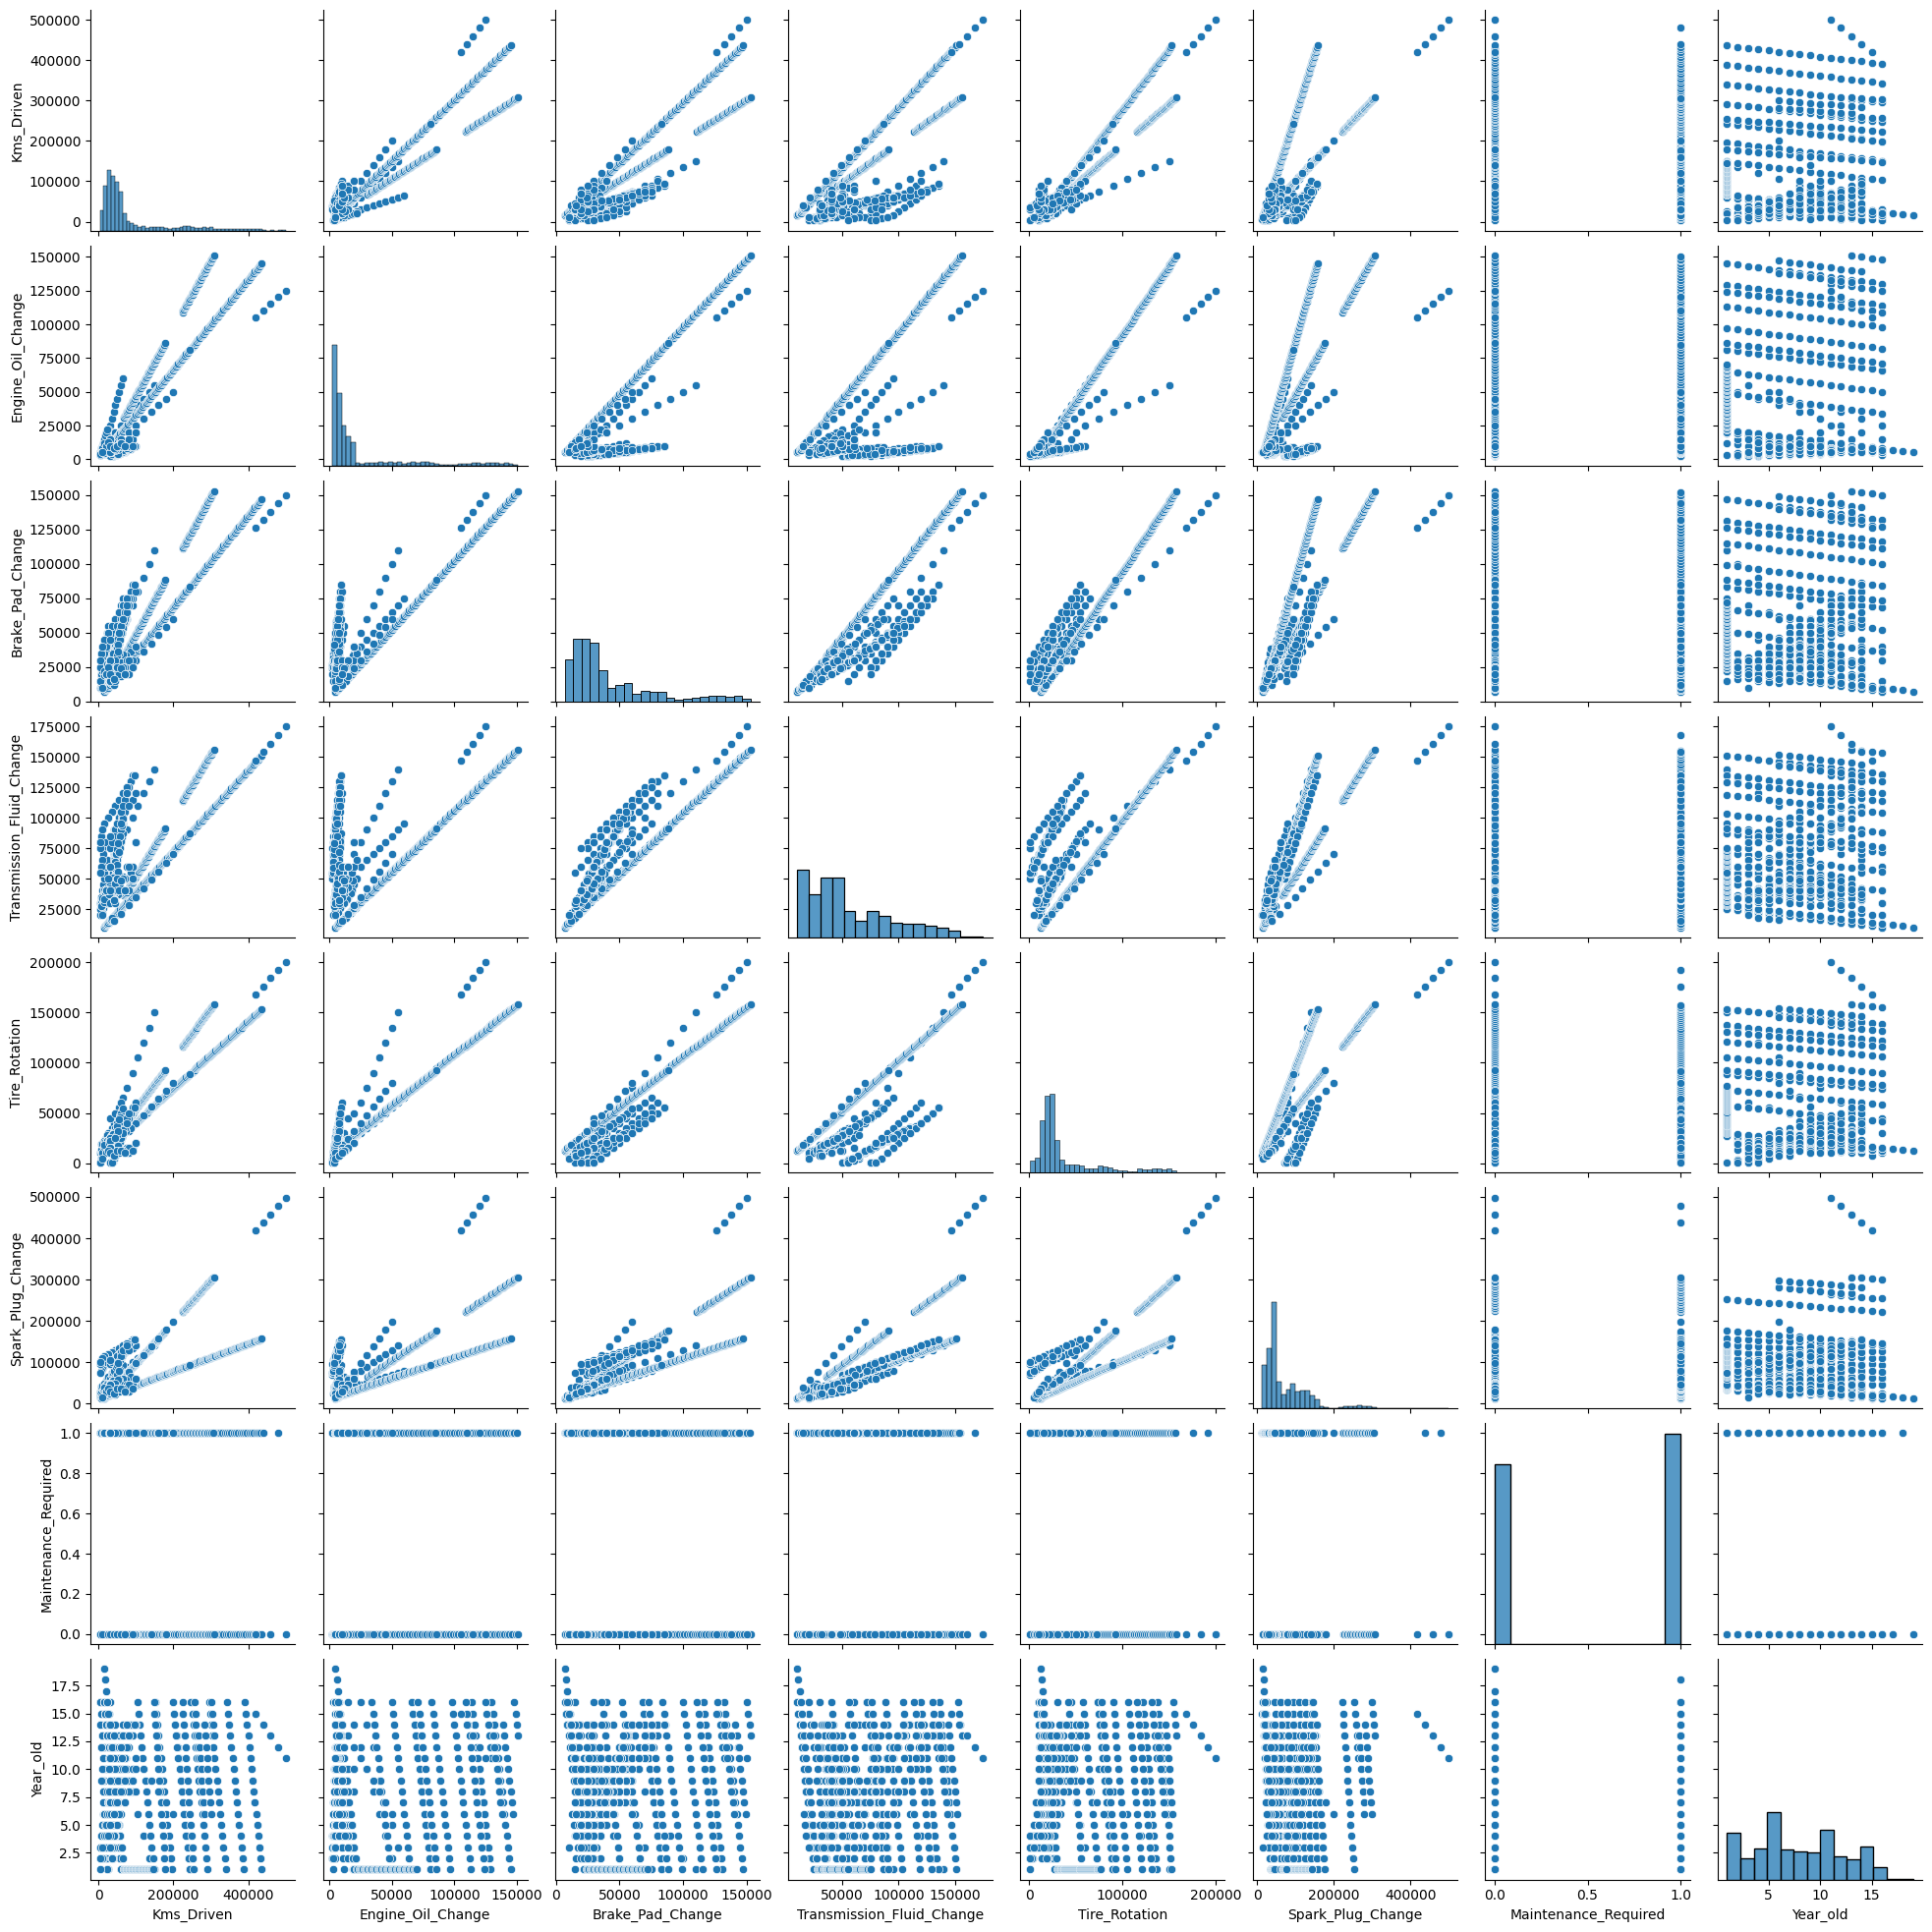

In [19]:
sns.pairplot(data)
# This shows the relationship for (n,2) combination of variable in a DataFrame 
# as a matrix of plots and the diagonal plots are the univariate plots.

array([[<Axes: title={'center': 'Kms_Driven'}>,
        <Axes: title={'center': 'Engine_Oil_Change'}>,
        <Axes: title={'center': 'Brake_Pad_Change'}>],
       [<Axes: title={'center': 'Transmission_Fluid_Change'}>,
        <Axes: title={'center': 'Tire_Rotation'}>,
        <Axes: title={'center': 'Spark_Plug_Change'}>],
       [<Axes: title={'center': 'Maintenance_Required'}>,
        <Axes: title={'center': 'Year_old'}>, <Axes: >]], dtype=object)

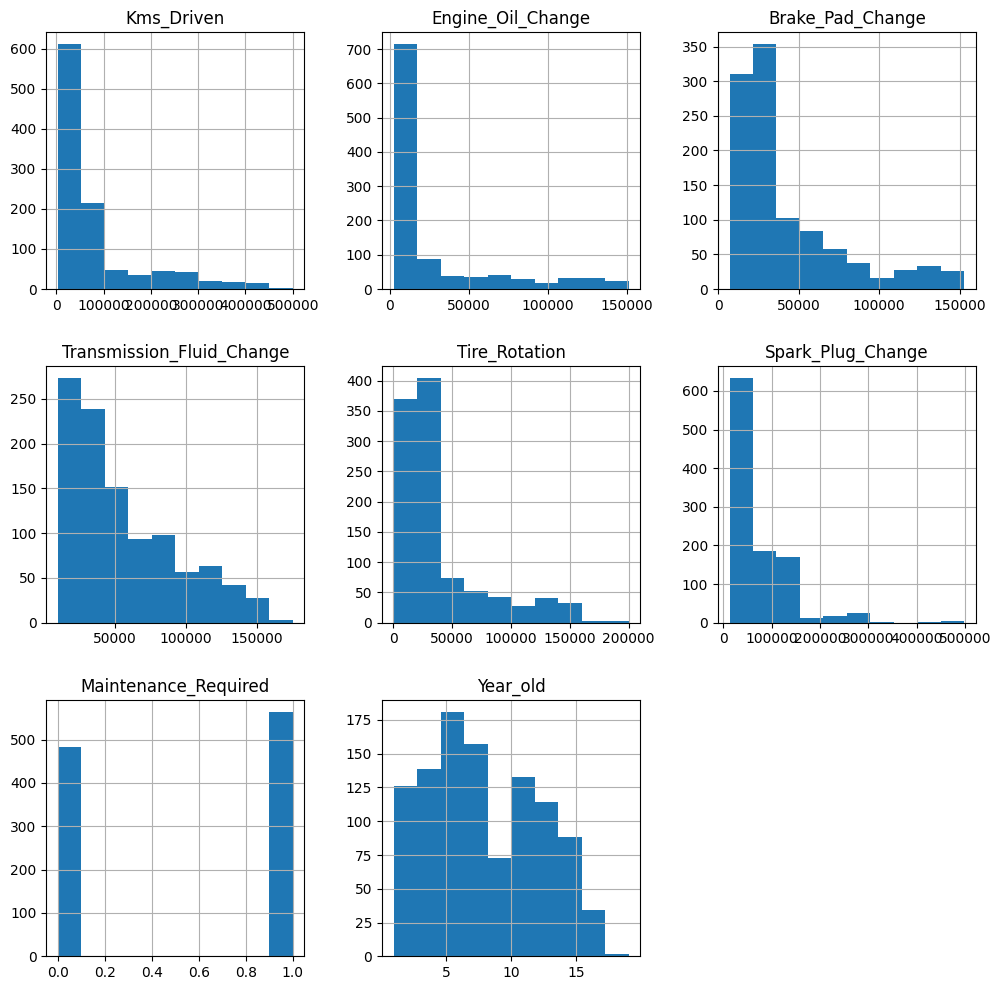

In [20]:
#to visualize the feature using histogram
data.hist(figsize=(12,12))

In [21]:
print(data.corr())


                           Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  \
Kms_Driven                   1.000000           0.950339          0.912161   
Engine_Oil_Change            0.950339           1.000000          0.900833   
Brake_Pad_Change             0.912161           0.900833          1.000000   
Transmission_Fluid_Change    0.735064           0.674756          0.918004   
Tire_Rotation                0.951393           0.963147          0.948427   
Spark_Plug_Change            0.715519           0.717969          0.869697   
Maintenance_Required        -0.051303          -0.051187         -0.052180   
Year_old                     0.062204           0.016581          0.078338   

                           Transmission_Fluid_Change  Tire_Rotation  \
Kms_Driven                                  0.735064       0.951393   
Engine_Oil_Change                           0.674756       0.963147   
Brake_Pad_Change                            0.918004       0.948427   
Transmission_

<Axes: >

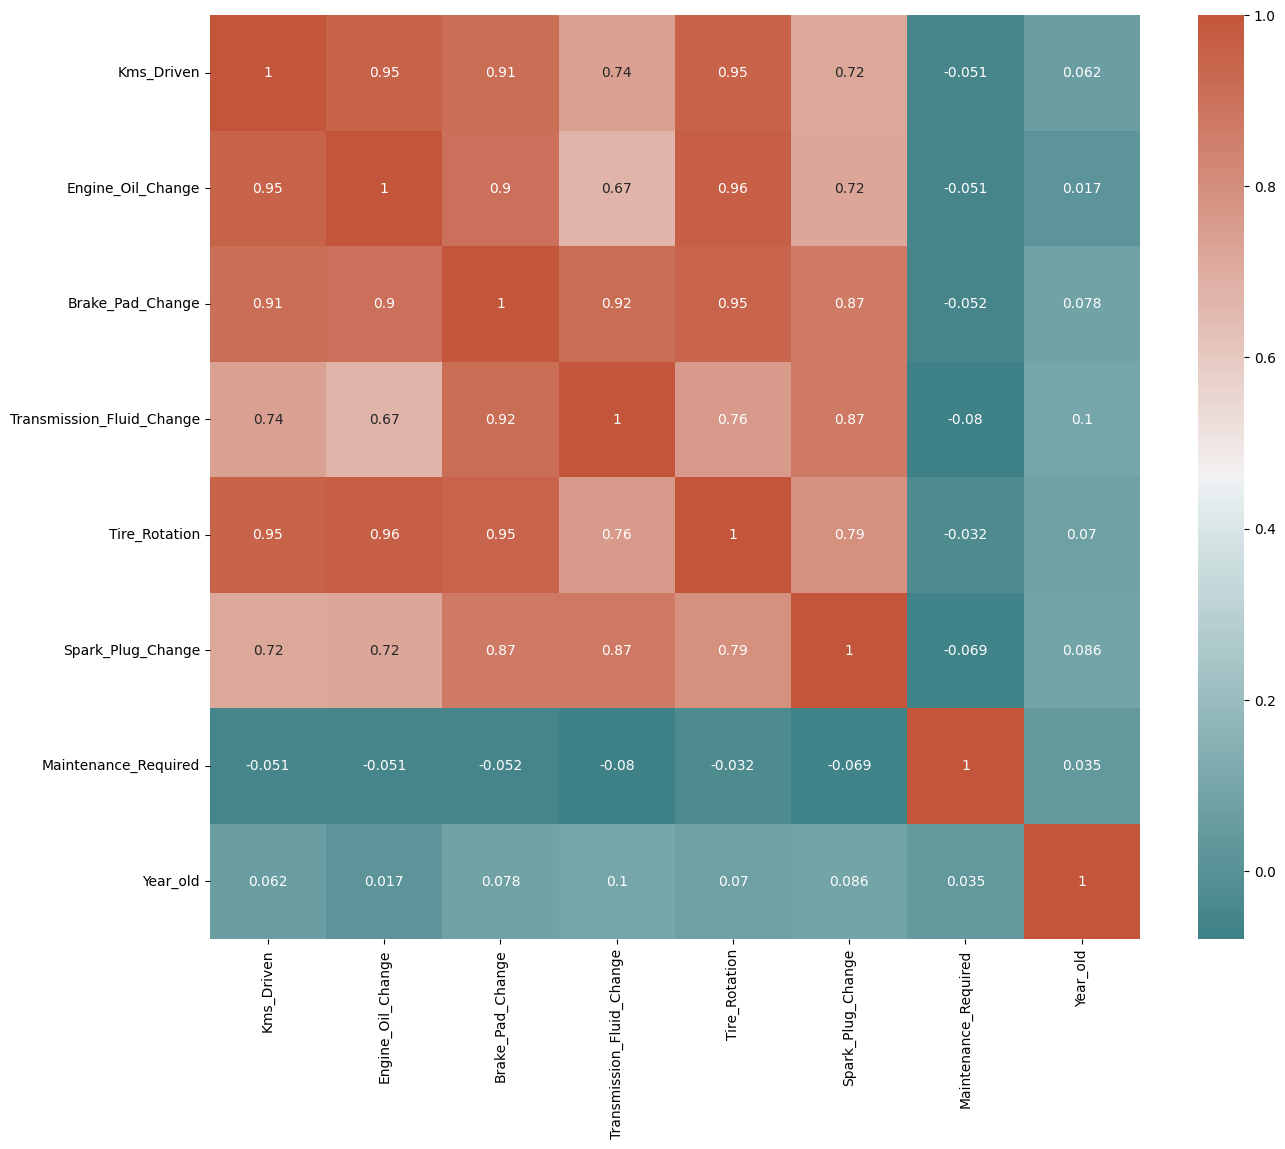

In [22]:
#correlation matrix
#it is to find the dependency of column to target value
corr = data.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

In [23]:
#Training and testing
X = data.drop('Maintenance_Required',axis=1)
y = data['Maintenance_Required']

In [24]:
#statistical measures about the data
data.describe().T

count          mean           std      min  \
Kms_Driven                 1047.0  83782.234957  94985.972344   3000.0   
Engine_Oil_Change          1047.0  27419.675263  37149.077416   2400.0   
Brake_Pad_Change           1047.0  42215.854823  33971.352468   7000.0   
Transmission_Fluid_Change  1047.0  56468.958930  37277.122777  10000.0   
Tire_Rotation              1047.0  39218.720153  37432.136339    500.0   
Spark_Plug_Change          1047.0  74004.297994  61761.864813  13000.0   
Maintenance_Required       1047.0      0.538682      0.498740      0.0   
Year_old                   1047.0      7.785100      4.233465      1.0   

                               25%      50%       75%       max  
Kms_Driven                 28500.0  45000.0   80000.0  500000.0  
Engine_Oil_Change           5600.0  10000.0   24500.0  151000.0  
Brake_Pad_Change           20000.0  28000.0   54500.0  153000.0  
Transmission_Fluid_Change  25000.0  44000.0   80000.0  175000.0  
Tire_Rotation              18000.0  23000.0   45000.0  200000.0  
Spark_Plug_Change          36000.0  46000.0  100000.0  498000.0  
Maintenance_Required           0.0      1.0       1.0       1.0  
Year_old                       4.0      7.0      11.0      19.0

In [25]:
#Spliting the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=6)

In [26]:
# features scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (837, 7)
Shape of y_train (837,)
Shape of X_test (210, 7)
Shape of y_test (210,)


Decision Tree
ACCURACY score on train data 64.63560334528077
Accuracy Score on test data 57.14285714285714
Classification Report
               precision    recall  f1-score   support

           0       0.50      0.80      0.62        91
           1       0.72      0.39      0.51       119

    accuracy                           0.57       210
   macro avg       0.61      0.60      0.56       210
weighted avg       0.63      0.57      0.56       210
 

Confusion Matrix
 [[73 18]
 [72 47]]


<Axes: >

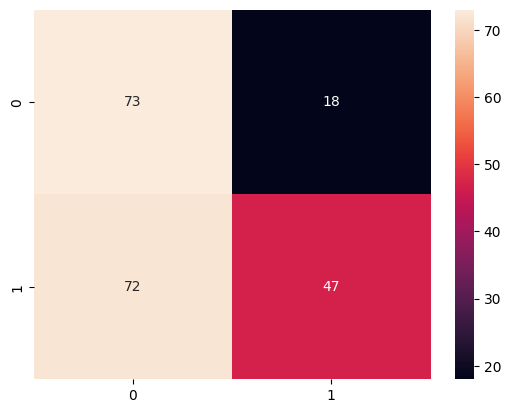

In [28]:
#Decision Tree
print("Decision Tree")
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier( max_depth=5)
tree.fit(X_train, y_train)
pred=tree.predict(X_test)
acc=accuracy_score(y_test,pred)
#print("Acurray on test set: {:.2f}%".format(acc*100))
print("ACCURACY score on train data",accuracy_score(y_train, tree.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

Naive Bayes
ACCURACY score on train data 55.43608124253285
ACCURACY on test data 52.38095238095239
Classification Report
               precision    recall  f1-score   support

           0       0.38      0.16      0.23        91
           1       0.56      0.80      0.66       119

    accuracy                           0.52       210
   macro avg       0.47      0.48      0.44       210
weighted avg       0.48      0.52      0.47       210
 

Confusion Matrix [[15 76]
 [24 95]]


<Axes: >

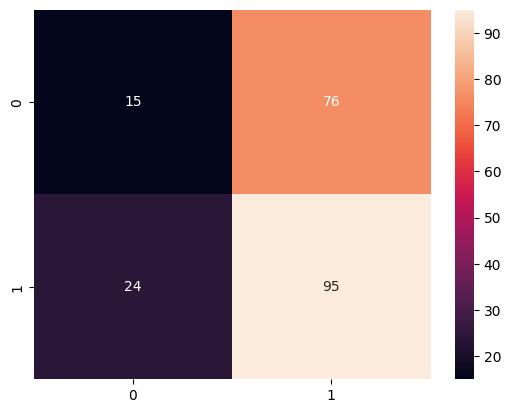

In [29]:
##Naive Bayes
print("Naive Bayes")
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
pred = nb_model.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, nb_model.predict(X_train))*100)
print("ACCURACY on test data",accuracy_score(y_test, pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

Logistic Regression
ACCURACY score on train data 57.94504181600956
Accuracy Score on test data 58.57142857142858
Classification Report
               precision    recall  f1-score   support

           0       0.53      0.34      0.42        91
           1       0.61      0.77      0.68       119

    accuracy                           0.59       210
   macro avg       0.57      0.56      0.55       210
weighted avg       0.57      0.59      0.57       210
 

Confusion Matrix [[31 60]
 [27 92]]


<Axes: >

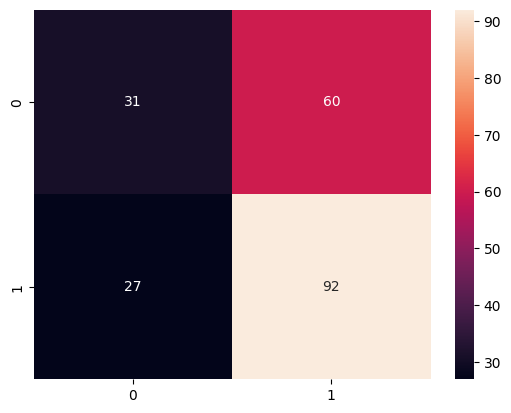

In [30]:
#Logistic Regression
print("Logistic Regression")
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
#training the logistic regression model with training data
lr_model.fit(X_train,y_train)
pred = lr_model.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, lr_model.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [31]:
#to find the best score of KNN - to get best value of k
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for k in range(1,40):
  knnn=KNeighborsClassifier(n_neighbors=k)
  knnn.fit(X_train,y_train)
  knn_scores.append(knnn.score(X_test,y_test))

print(f'Best choice of k: {np.argmax(knn_scores)+1}')

Best choice of k: 1


KNN
ACCURACY score on train data 71.08721624850656
Accuracy Score on test data 50.95238095238095
Classification Report
               precision    recall  f1-score   support

           0       0.45      0.59      0.51        91
           1       0.59      0.45      0.51       119

    accuracy                           0.51       210
   macro avg       0.52      0.52      0.51       210
weighted avg       0.53      0.51      0.51       210
 

Confusion Matrix
 [[54 37]
 [66 53]]


<Axes: >

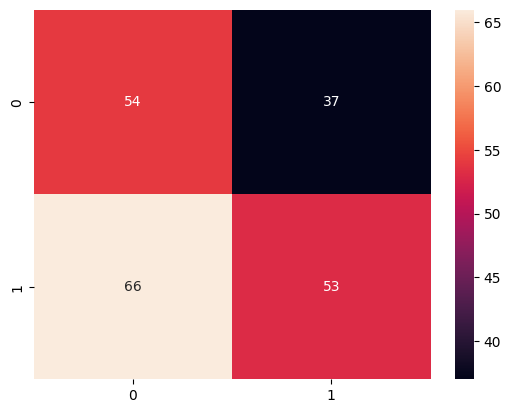

In [32]:
#KNN
print("KNN")
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5,metric="minkowski")
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, KNN.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')


In [33]:
#to get best n_estimators for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_g={
    'n_estimators': range(1,1000,100),
}
rf=RandomForestClassifier()
rf_ran = RandomizedSearchCV(param_distributions=rf_g,estimator=rf,scoring="accuracy",verbose=0,n_iter=100,cv=4)
rf_ran.fit(X_train,y_train)
best_params=rf_ran.best_params_
print(best_params)

{'n_estimators': 1}


Random Forest Classification
ACCURACY score on train data 60.45400238948626
Accuracy Score on test data 59.04761904761905
Classification Report
               precision    recall  f1-score   support

           0       0.53      0.56      0.54        91
           1       0.65      0.61      0.63       119

    accuracy                           0.59       210
   macro avg       0.59      0.59      0.59       210
weighted avg       0.59      0.59      0.59       210
 

Confusion Matrix [[51 40]
 [46 73]]


<Axes: >

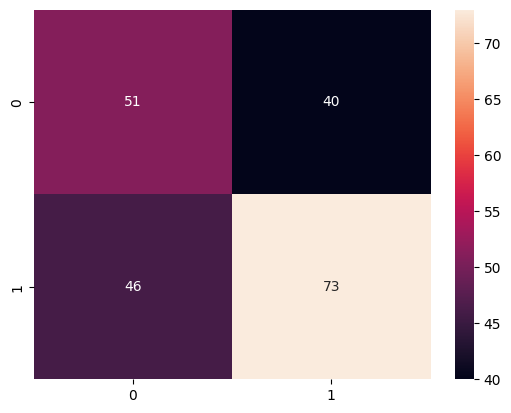

In [34]:
#Random Forest classifier
print("Random Forest Classification")
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 1, criterion = 'entropy', random_state = 101,max_depth=4)
rf_classifier.fit(X_train, y_train)
pred = rf_classifier.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, rf_classifier.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [35]:
#to get best kernel for svm
from sklearn import svm
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = svm.SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

print(kernels, svc_scores)

['linear', 'poly', 'rbf', 'sigmoid'] [0.5857142857142857, 0.580952380952381, 0.5428571428571428, 0.45714285714285713]


SVM
ACCURACY score on train data 57.70609318996416
Accuracy Score on test data 58.57142857142858
Classification Report
               precision    recall  f1-score   support

           0       0.53      0.34      0.42        91
           1       0.61      0.77      0.68       119

    accuracy                           0.59       210
   macro avg       0.57      0.56      0.55       210
weighted avg       0.57      0.59      0.57       210
 

Confusion Matrix [[31 60]
 [27 92]]


<Axes: >

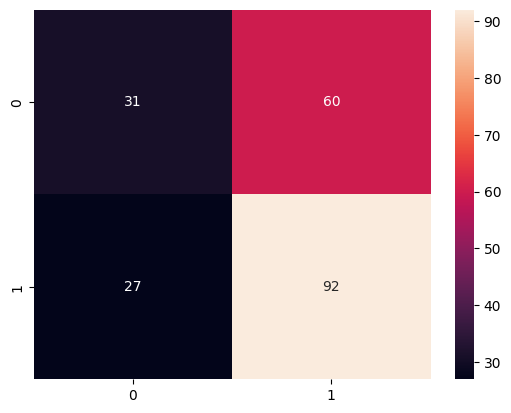

In [36]:
#SVM
print("SVM")
from sklearn import svm
sup = svm.SVC(kernel='linear')
sup.fit(X_train,y_train)
pred = sup.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, sup.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [37]:
#All Model Accuracy with Visual------6 models
Algo=[tree,KNN,nb_model,lr_model,rf_classifier,sup]
Scores=[]
for K in Algo:
  K.fit(X_train,y_train)
  Scores.append(K.score(X_test,y_test)*100)
Algo=["Decision Tree","K Neighbors","Naive Bayes","Logistic Regression","Random Forest","SVM"]
Table=pd.DataFrame()
Table['Algorithms']=Algo
Table['Accuracy']=Scores
Table

Algorithms   Accuracy
0        Decision Tree  57.142857
1          K Neighbors  50.952381
2          Naive Bayes  52.380952
3  Logistic Regression  58.571429
4        Random Forest  59.047619
5                  SVM  58.571429

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'K Neighbors'),
  Text(2, 0, 'Naive Bayes'),
  Text(3, 0, 'Logistic Regression'),
  Text(4, 0, 'Random Forest'),
  Text(5, 0, 'SVM')])

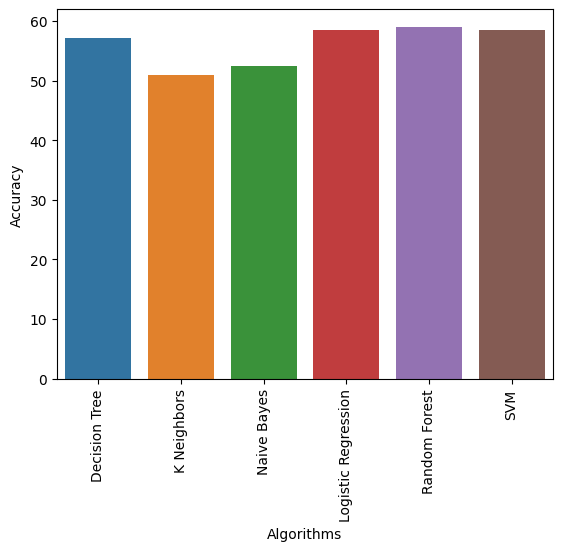

In [38]:
#Graph to show accuracy of the models
sns.barplot(x='Algorithms',y='Accuracy',data=Table)
plt.xticks(rotation=90) 

### **Exporting the tested model to a pickle file**

In [39]:
import pickle
with open('all.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(KNN, file)

In [40]:
#To give input we show data here
data.head()

Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  Transmission_Fluid_Change  \
0       30000              25000             40000                      60000   
1       35000              30000             45000                      65000   
2       40000              35000             50000                      70000   
3       45000              40000             55000                      75000   
4       50000              45000             60000                      80000   

   Tire_Rotation  Spark_Plug_Change  Maintenance_Required  Year_old  
0          30000              45000                     0        16  
1          35000              50000                     0        14  
2          40000              55000                     0        12  
3          45000              60000                     0         9  
4          50000              65000                     0         7

In [41]:
#Here we give input to model and predict
predicted = KNN.predict([[45000,3300,33000,65000,8000,85000,5]])

# Print the predicted mileage
print(f"Yes=1/ No=0: {predicted[0]}")

if predicted==1:
    print ("Need of maintanance")

else:
    print ("No need for maintenance")

Yes=1/ No=0: 0
No need for maintenance


Applying Explainable AI


In [42]:
#importing shap 
import shap
import matplotlib.pyplot as plt

Variable Importance Plot - Global Interpretation


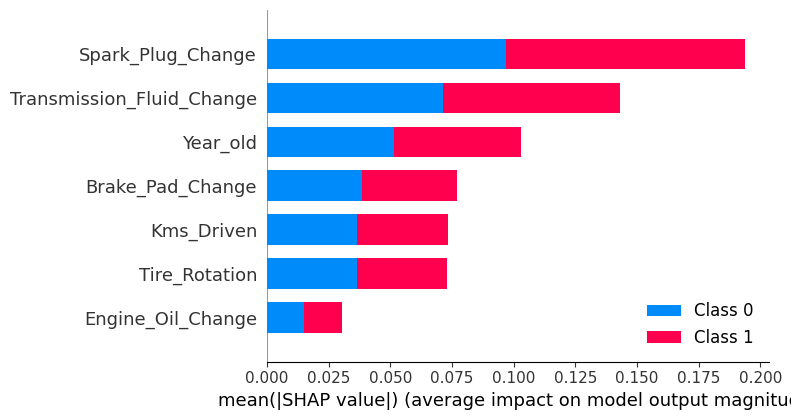

In [44]:
#Using decision Tree model
# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(tree)

shap_values = explainer.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test,feature_names=X.columns)


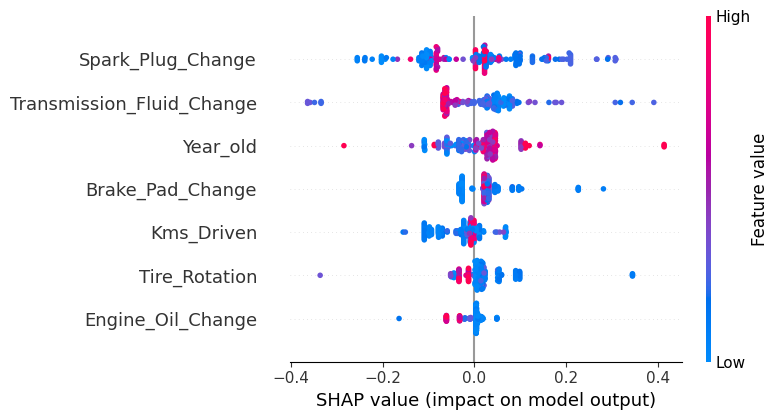

In [45]:
shap.summary_plot(shap_values[1], X_test,feature_names=X.columns)

Variable Importance Plot - Global Interpretation


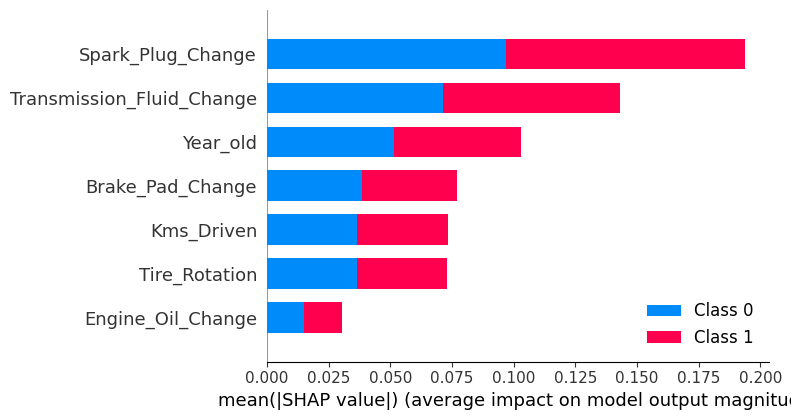

In [46]:
#Using Random Forest model
# Create the explainer
explainer1 = shap.TreeExplainer(rf_classifier)

shap_values1 = explainer1.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test,feature_names=X.columns)


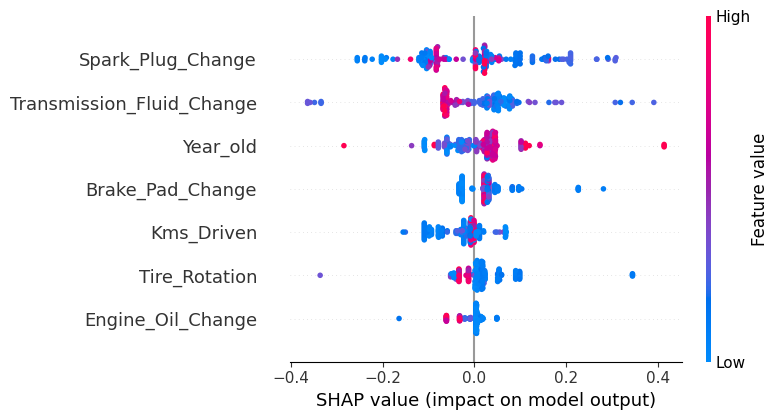

In [47]:
shap.summary_plot(shap_values[1], X_test,feature_names=X.columns)

In [48]:
feature_importances = tree.feature_importances_

In [49]:
# Create a SHAP explainer for the model
explainer = shap.Explainer(tree, X_train)

In [50]:
# Calculate SHAP values for the testing data
shap_values = explainer.shap_values(X_test)

In [51]:
# Make predictions
y_pred = tree.predict(X_test)

In [52]:
# Print individual SHAP explanations for a specific instance 
instance_index = 0
print("Predicted Class:", y_pred[instance_index])
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[instance_index], X_test[instance_index])

Predicted Class: 0


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Kms_Driven'),
  Text(1, 0, 'Engine_Oil_Change'),
  Text(2, 0, 'Brake_Pad_Change'),
  Text(3, 0, 'Transmission_Fluid_Change'),
  Text(4, 0, 'Tire_Rotation'),
  Text(5, 0, 'Spark_Plug_Change'),
  Text(6, 0, 'Year_old')])

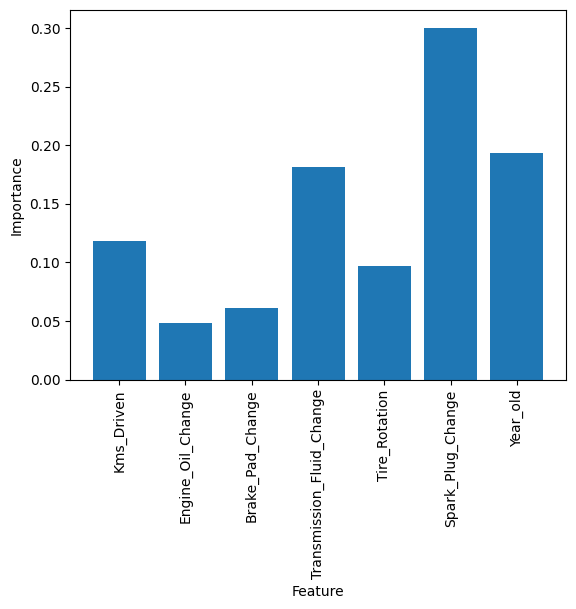

In [53]:
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90) 


In [54]:
#Importing LIME
import lime
from lime import lime_tabular

In [55]:
from interpret.blackbox import LimeTabular

In [56]:
from lime.lime_tabular import LimeTabularExplainer

In [57]:
from interpret import show

In [58]:
import pipeline

In [59]:
X_train_df = pd.DataFrame(X_train, columns=["Kms_Driven","Engine_Oil_Change","Brake_Pad_Change","Transmission_Fluid_Change","Tire_Rotation","Spark_Plug_Change","Year_old"])

In [60]:
X_test_df = pd.DataFrame(X_test, columns=["Kms_Driven","Engine_Oil_Change","Brake_Pad_Change","Transmission_Fluid_Change","Tire_Rotation","Spark_Plug_Change","Year_old"])

In [61]:
explainer = LimeTabularExplainer(training_data=X_train,
                                 mode="classification",
                                 feature_names=X.columns,
                                 class_names=["No need", "Need"],
                                 discretize_continuous=True,
                                 random_state=1)

In [62]:
predict_fn = lambda x: tree.predict_proba(x)

In [63]:
explanation = explainer.explain_instance(X_test_df.iloc[0], predict_fn, top_labels=1)

In [64]:
explanation.show_in_notebook()

In [65]:
#Here we give input to model and predict
predicted = tree.predict([[40000,5500,21000,33000,18000,38000,6]])

# Print the predicted mileage
print(f"Yes=1/ No=0: {predicted[0]}")

if predicted==1:
    print ("Need of maintanance")

else:
    print ("No need for maintenance")

Yes=1/ No=0: 1
Need of maintanance


In [66]:
# Assuming 'X_instance' is the instance for which you want an explanation
X_instance1 = [(40000,5500,21000,33000,18000,38000,6)]

In [67]:
X_instance_array1 = np.array(X_instance1)

# Reshape the NumPy array
X_instance_array1 = X_instance_array1[np.newaxis, :]
X_instance_array1 = X_instance_array1.reshape(1, -1)
# Get the model's prediction
prediction = tree.predict(X_instance_array1)[0]

In [68]:
predict_fn = lambda x: tree.predict_proba(X_instance_array1)

In [69]:
explanation.show_in_notebook()

In [70]:
# Assuming 'X_instance' is the instance for which you want an explanation
X_instance = [(25000,5000,20000,30000,15000,40000,5)]

In [71]:
X_instance_array = np.array(X_instance)

# Reshape the NumPy array
X_instance_array = X_instance_array[np.newaxis, :]
X_instance_array = X_instance_array.reshape(1, -1)
# Get the model's prediction
prediction = tree.predict(X_instance_array)[0]

In [72]:
predict_fn = lambda x: tree.predict_proba(X_instance_array)

In [73]:
# Get a local explanation using Lime
explanation1 = explainer.explain_instance(X_instance_array[0], tree.predict_proba, top_labels=1)

In [74]:
explanation1.show_in_notebook()

In [75]:
data.head()

Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  Transmission_Fluid_Change  \
0       30000              25000             40000                      60000   
1       35000              30000             45000                      65000   
2       40000              35000             50000                      70000   
3       45000              40000             55000                      75000   
4       50000              45000             60000                      80000   

   Tire_Rotation  Spark_Plug_Change  Maintenance_Required  Year_old  
0          30000              45000                     0        16  
1          35000              50000                     0        14  
2          40000              55000                     0        12  
3          45000              60000                     0         9  
4          50000              65000                     0         7